** This code is to solve Kaggle's Titanic Problem using various Machine Learning Algos.This code is inspired by many blogs, online courses & books and offcourse my research. Big thanks to all of those folks who helped me in getting tips to optimize this problem. I'll keep optimizing this code, below is the latest Kaggle ranking. **

**Current Kaggle Ranking of this submission is - 6039 / 9585 and it's top 64% with a score of 0.77033. It's my second submission and first submission was like top 90% and after this code I got a jump of 1500+ rank, so not a bad progress. **

## 1. Import useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

## 2. Import Training and Test Data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Create helper functions

** 3.1 Handling Missing Data**

In [3]:
def process_name(data_set):    
        data_set['Title']=train.Name.str.extract('([A-Za-z]+)\.')
        data_set['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)  

In [4]:
def handle_missing_data(data_set):
    data_set['Age'] = data_set[['Age','Pclass']].apply(impute_age,axis=1)
    data_set['Fare'] = data_set[['Fare','Pclass']].apply(impute_fare,axis=1)    
    data_set['Embarked'] = data_set[['Embarked']].apply(impute_embarked,axis=1)

In [5]:
def impute_age(cols):    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [6]:
def impute_fare(cols):    
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 3:
            return 10
        
        elif Pclass == 2:
            return 20
        
        else:
            return 90
        
    else:
        return Fare

In [7]:
def impute_embarked(cols):
    if pd.isnull(cols[0]):
        return 'S'
    else:
        return cols[0]

** 3.2 Handling Encoding **

In [8]:
def one_hot_encoding(data_set,column_name):
    if data_set == 'train':        
        temp = pd.get_dummies(train[column_name], drop_first=True, prefix=column_name)
        return pd.concat([train,temp], axis=1)
    
    if data_set == 'test':        
        temp = pd.get_dummies(test[column_name], drop_first=True, prefix=column_name)
        return pd.concat([test,temp], axis=1)

** 3.3 Training model using K-Fold Cross Validation Approach **

In [9]:
def run_model_kfold (model):
    accuracy_list = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
    
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
    
        accuracy = accuracy_score(y_test, predictions)
        accuracy_list.append(accuracy)

    print("Accuracy: %.2f%%" % (np.mean(accuracy_list) * 100.0))

** 3.4 Generate Submission Files **

In [10]:
def generate_submission_file(model,output_file):              
    predictions = model.predict(test_mini)
    submission = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': predictions }).astype(int) 
    submission.to_csv(output_file,index=False)  
    print('NOTE: submission file {0} is succesfully generted, upload it to Kaggle and check your ranking..'.format(output_file))

## 4. Get familiar with Titanic Data Set

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Feature Engineering

** 5.1 Fix Missing Data in the Training data set. **

In [14]:
handle_missing_data(train)
process_name(train)

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


** 5.2 Convert Categorical data to multiple columns using One - hot encoding..**

In [16]:
train = one_hot_encoding('train','Sex')
train = one_hot_encoding('train','Pclass')
train = one_hot_encoding('train','SibSp')
train = one_hot_encoding('train','Parch')
train = one_hot_encoding('train','Embarked')
train = one_hot_encoding('train','Title')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,1,0,0


## 6. Prepare final data for training the model..

In [18]:
train_mini = train[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Pclass_2', 'Pclass_3','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_Q','Embarked_S','Title_Miss','Title_Mr','Title_Mrs','Title_Other']]

In [19]:
train_mini.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_1,...,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,1,0,7.2500,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


## 7. Train the model using particular algorithim..

In [20]:
X = train_mini.drop('Survived',axis=1)
y = train_mini['Survived']

** 7.1 Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
run_model_kfold(logmodel)

Accuracy: 82.04%


** 7.2 Decision Trees **

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
run_model_kfold(dtree)

Accuracy: 78.67%


** 7.3 Random Forest **

In [23]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=100)
run_model_kfold(randomf)

Accuracy: 80.69%


** 7.4 Extreme Gradient Boosting **

In [24]:
from xgboost import XGBClassifier  
xgb = XGBClassifier()
run_model_kfold(xgb)

Accuracy: 83.50%


## 8. Predicting Test Data from the Trained Model

** 8.1. Handling Missing Data **

In [25]:
handle_missing_data(test)
process_name(test)

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


** 8.2 Handling Categorical Data **

In [26]:
test = one_hot_encoding('test','Sex')
test = one_hot_encoding('test','Pclass')
test = one_hot_encoding('test','SibSp')
test = one_hot_encoding('test','Parch')
test = one_hot_encoding('test','Embarked')
test = one_hot_encoding('test','Title')

** 8.3. Preparing data for Predictions **

In [27]:
test_mini = test[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Pclass_2', 'Pclass_3','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6','Embarked_Q','Embarked_S','Title_Miss','Title_Mr','Title_Mrs','Title_Other']]

** 8.4. Generate Submission File **

In [32]:
generate_submission_file(logmodel,'logmodel.csv')
# generate_submission_file(dtree,'dtree.csv')
# generate_submission_file(randomf,'randomf.csv')
# generate_submission_file(xgb,'xgb.csv') #this is not working! Need to fix it.

NOTE: submission file logmodel.csv is succesfully generted, upload it to Kaggle and check your ranking..


** PLACEHOLDER : Research on feature selection process and discarding the unwanted ones **

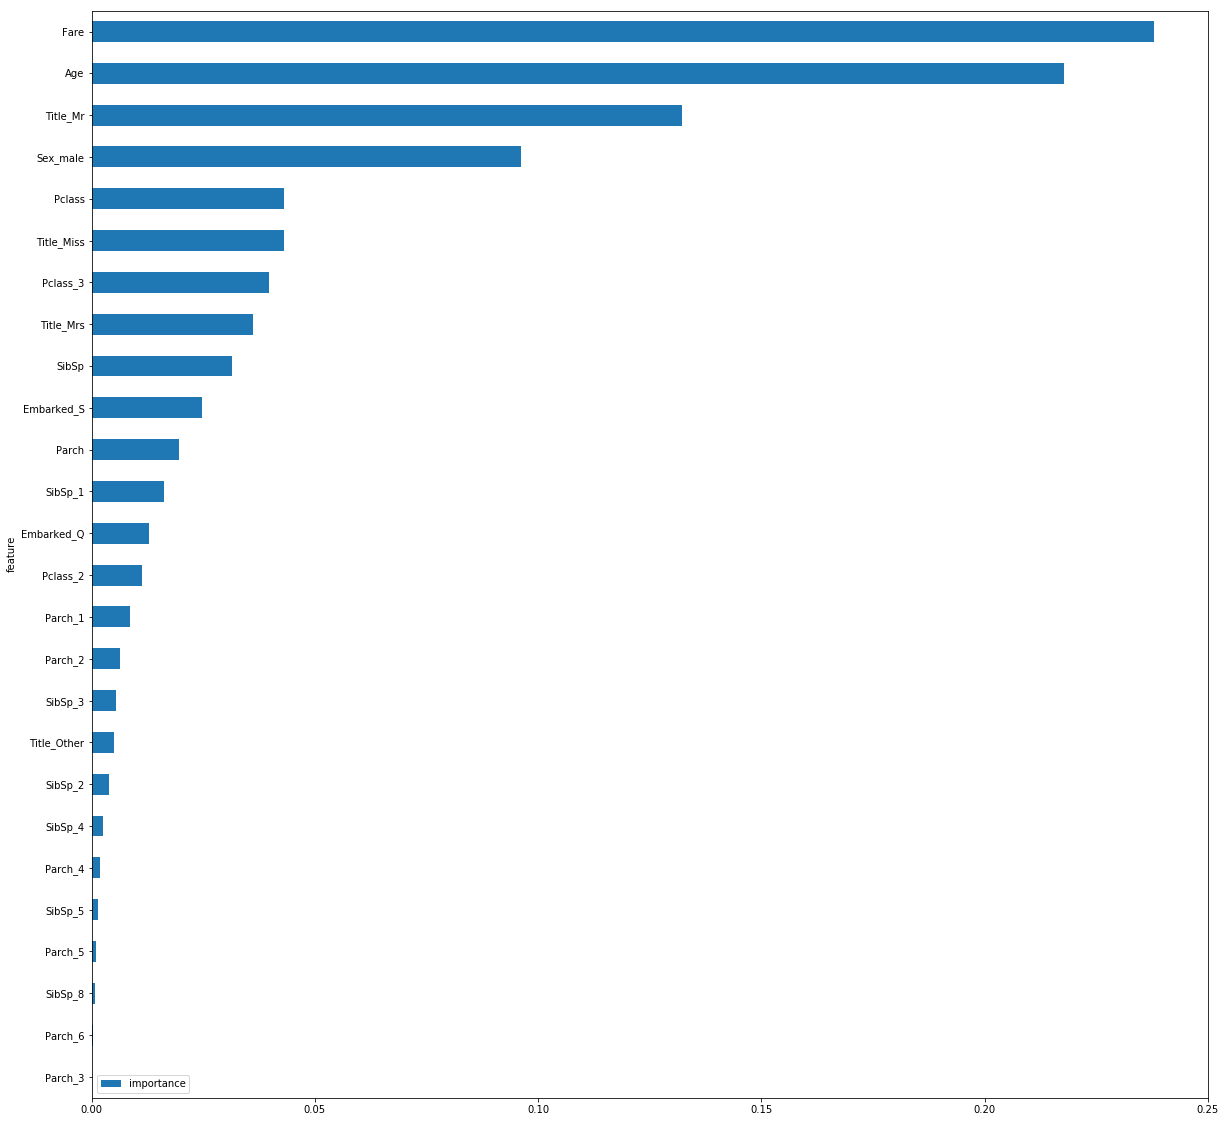

In [54]:
from sklearn.feature_selection import SelectFromModel
features = pd.DataFrame()
features['feature'] = test_mini.columns
features['importance'] = randomf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))